<a href="https://colab.research.google.com/github/joaoromaniello/lista2MS/blob/main/Trab2MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1

### Alternativa A)

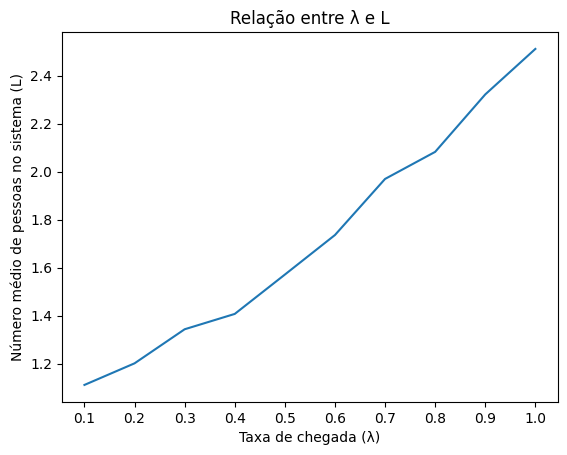

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
montecarlo = 1000

def simulate(lambda_, mu1=1, mu2=1, num_clients=10000):
    t1 = 0  # Tempo que o cliente passa na cadeira de massagem
    t2 = float('inf')  # Tempo que o cliente passa na cadeira de acupuntura
    clients_in_system = 0  # Número de clientes no sistema
    total_clients = 0  # Contador total de clientes

    for _ in range(num_clients):
        arrival = np.random.exponential(1/lambda_)
        service1 = np.random.exponential(1/mu1)
        service2 = np.random.exponential(1/mu2)

        # Se a cadeira de acupuntura está ocupada quando a massagem termina, o cliente espera
        if t1 + service1 < t2:
            clients_in_system += 1
            t2 = t1 + service1 + service2
        else:
            t2 += service2

        t1 += max(arrival, service1)

        total_clients += clients_in_system

    # Retorna o número médio de clientes no sistema
    return total_clients / num_clients

# Valores de lambda para os quais iremos simular
lambdas = np.linspace(0.1, 1, 10)

results = []

for lambda_ in lambdas:
    total = 0
    for i in range (0,montecarlo):
        result = simulate(lambda_, num_clients=5000)
        total += result
    results.append(total/montecarlo)

# Plotamos o gráfico
plt.plot(lambdas, results)
plt.xticks(lambdas)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.title("Relação entre λ e L")
plt.xlabel('Taxa de chegada (λ)')
plt.ylabel('Número médio de pessoas no sistema (L)')
plt.show()


### Alternativa B)


Para uma fila de mais de uma pessoa, o antendimento parece "Estabilizar" e com isso, o numero de pessoas no sistema permanecerá constante

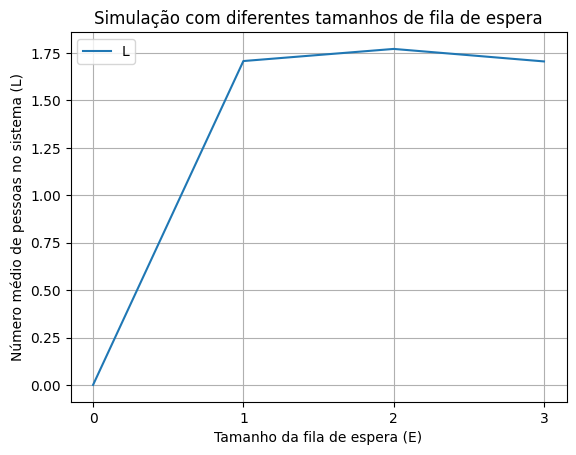

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

montecarlo = 500


def simulate(E, lambda_=0.8, mu1=1, mu2=1, num_clients=10000):
    t1 = 0  # Tempo que o cliente passa na cadeira de massagem
    t2 = float('inf')  # Tempo que o cliente passa na cadeira de acupuntura
    waiting_time = 0  # Tempo total de espera
    clients_in_system = 0  # Número de clientes no sistema
    total_clients = 0  # Contador total de clientes
    queue = []  # Fila de espera

    for _ in range(num_clients):
        arrival = np.random.exponential(1 / lambda_)
        service1 = np.random.exponential(1 / mu1)
        service2 = np.random.exponential(1 / mu2)

        # Se a fila não estiver cheia, o cliente entra na fila
        if len(queue) < E:
            queue.append((arrival, service1, service2))

        # Se a cadeira de acupuntura está ocupada quando a massagem termina, o cliente espera
        if len(queue) > 0 and t1 + queue[0][1] < t2:
            arrival, service1, service2 = queue.pop(0)
            clients_in_system += 1
            waiting_time += t1 - arrival
            t2 = t1 + service1 + service2
        elif t1 < t2:
            t2 += service2

        t1 += max(arrival, service1)

        total_clients += clients_in_system

    # Retorna o número médio de clientes no sistema e o tempo médio de espera
    return total_clients / num_clients, waiting_time / num_clients


# Valores de E para os quais iremos simular
Es = list(range(4))

results = []

# Realiaza
for E in Es:
    total1 = 0
    total2 = 0
    for i in range(0, montecarlo):
        result = simulate(E, num_clients=5000)
        total1 += result[0]
        total2 += result[1]

    results.append((total1 / montecarlo, total2 / montecarlo))

# Separamos os resultados em duas listas
L_values, W_values = zip(*results)

# Plotamos o gráfico
plt.plot(Es, L_values, label='L')
plt.xticks(Es)
plt.xlabel('Tamanho da fila de espera (E)')
plt.ylabel('Número médio de pessoas no sistema (L)')
plt.title('Simulação com diferentes tamanhos de fila de espera')
plt.grid(True)
plt.legend()
plt.show()


#Questão 2

Ao analisar o resultado é possivel aferir que a medida que a probabilidade de ser preferencial é maior, o tempo de espera é menor

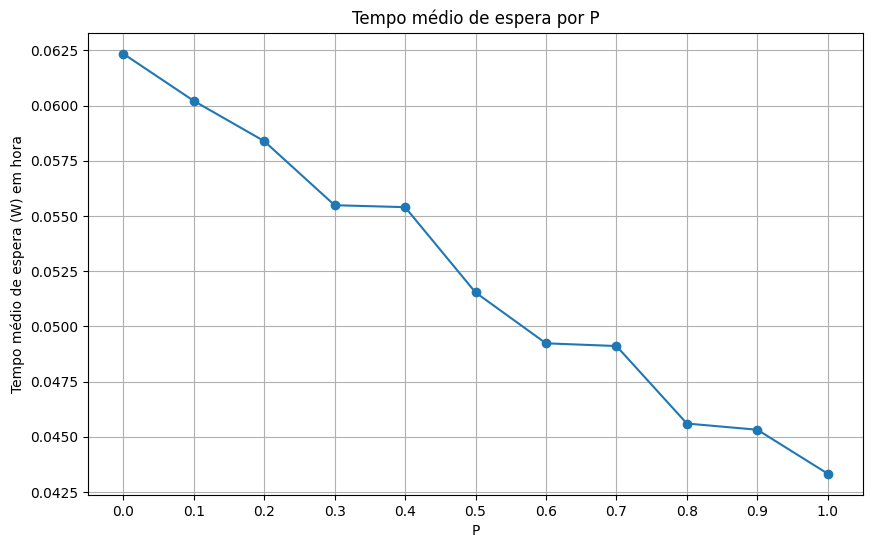

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

montecarlo = 50000

def MM1_sim(lambda_, mu, P, num_simulations):
    W_values = []
    for _ in range(num_simulations):
        num_clients = np.random.poisson(lambda_)
        service_times = np.random.exponential(1/mu, num_clients)
        arrival_times = np.cumsum(service_times)

        waiting_times = [0]  # O primeiro cliente não espera
        for i in range(1, num_clients):
            wait = max(0, arrival_times[i-1] + service_times[i-1] - arrival_times[i])
            waiting_times.append(wait)

        # Agora considerando a prioridade do cliente preferencial
        if np.random.rand() < P:  # Cliente preferencial
            waiting_times = [0] + waiting_times

        W_values.append(np.mean(waiting_times))
    return W_values

lambda_ = 1
mu = 1.2
P_values = np.linspace(0, 1, 11)  # Cria 11 valores de P de 0 a 1 inclusivo

# Para o gráfico de linha
average_waiting_times = []
# Para o boxplot
all_W_values = []

for P in P_values:
    W_values = MM1_sim(lambda_, mu, P, montecarlo)
    average_waiting_times.append(np.mean(W_values))
    all_W_values.append(W_values)

#A) Boxplot
plt.figure(figsize=(10, 6))
plt.plot(P_values, average_waiting_times, marker='o')
plt.title("Tempo médio de espera por P")
plt.xlabel("P")
plt.ylabel("Tempo médio de espera (W) em hora")
plt.xticks(P_values)
plt.grid(True)
plt.show()


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


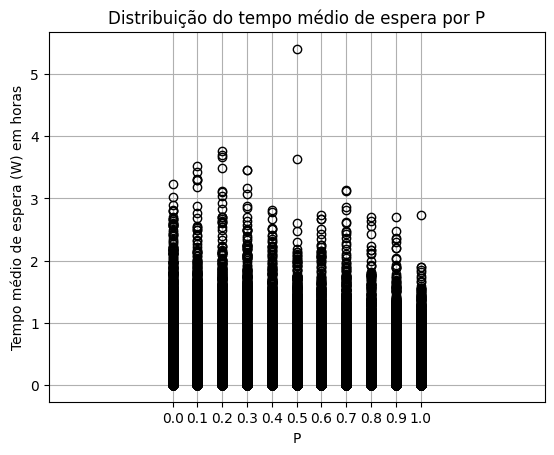

In [ ]:
#B) Boxplot
import matplotlib.ticker as ticker

plt.boxplot(all_W_values, positions=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], widths=0.0000001)

a = np.linspace(0, 1, 11)
print(a)
plt.title("Distribuição do tempo médio de espera por P")
plt.xlabel("P")
plt.ylabel("Tempo médio de espera (W) em horas")

plt.grid(True)
plt.show()


Ao analisar, é possivel aferir que com P=0, o tempo médio varia de 0 a 2.8 com muitas ocorrências, e vai diminuindo com a medida que a probabilidade aumenta

# Questão 3

Uma coisa que fica bem perceptivel é que com a adição de mais um servidor, o tempo de espera na fila diminiu, e o tempo ocioso dos atendentes aumenta

### Alternativa A

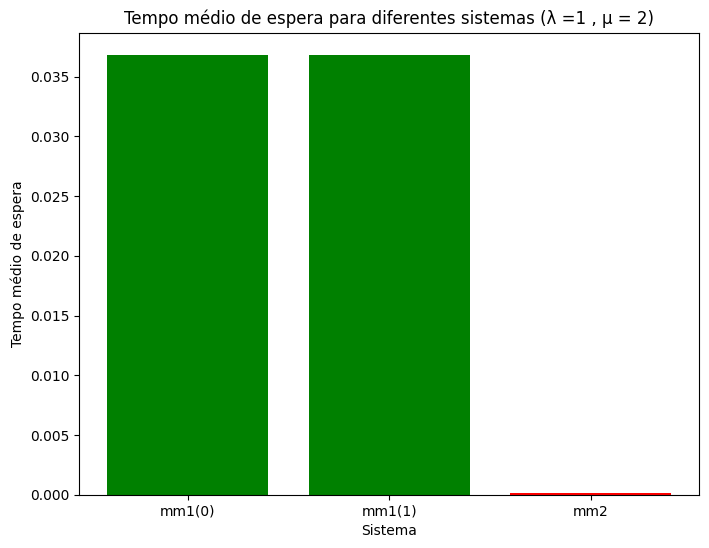

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

montecarlo = 1000

def MM1_wait_time(lambda_, mu, num_simulations):
    W_values = []
    for _ in range(num_simulations):
        num_clients = np.random.poisson(lambda_)
        service_times = np.random.exponential(1/mu, num_clients)
        arrival_times = np.cumsum(service_times)

        # O primeiro cliente não espera
        waiting_times = [0]
        for i in range(1, num_clients):
            wait = max(0, arrival_times[i-1] + service_times[i-1] - arrival_times[i])
            waiting_times.append(wait)

        W_values.append(np.mean(waiting_times))
    return np.mean(W_values)


def MM2_wait_time(lambda_, mu, num_simulations):
    W_values = []
    for _ in range(num_simulations):
        num_clients = np.random.poisson(lambda_)
        service_times = np.random.exponential(1 / mu, num_clients)
        arrival_times = np.cumsum(service_times)

        service_end_times_1 = [0]
        service_end_times_2 = [0]
        waiting_times = [0]  # O primeiro cliente não espera
        for i in range(1, num_clients):
            # O cliente vai para o servidor que terminará primeiro
            if service_end_times_1[-1] <= service_end_times_2[-1]:
                service_end_times_1.append(max(arrival_times[i], service_end_times_1[-1]) + service_times[i])
                wait = max(0, service_end_times_1[-2] - arrival_times[i])
            else:
                service_end_times_2.append(max(arrival_times[i], service_end_times_2[-1]) + service_times[i])
                wait = max(0, service_end_times_2[-2] - arrival_times[i])

            waiting_times.append(wait)

        W_values.append(np.mean(waiting_times))

    return np.mean(W_values)


lambda_ = 1
mu = 2

wait_val_mm1_1 = 0
wait_val_mm1_2 = 0
wait_val_mm2 = 0

for i in range(0,montecarlo):
    wait_val_mm1_1 += MM1_wait_time(lambda_, mu, montecarlo)
    wait_val_mm1_2 += MM1_wait_time(lambda_, mu, montecarlo)
    wait_val_mm2   += MM2_wait_time(lambda_, mu, montecarlo)

wait_val_mm1_1 /= montecarlo
wait_val_mm1_2 /= montecarlo
wait_val_mm2   /= montecarlo


values = [wait_val_mm1_1, wait_val_mm1_2, wait_val_mm2]

labels = ['mm1(0)', 'mm1(1)', 'mm2']
colors = ['green', 'green', 'red']
plt.figure(figsize=(8, 6))
# Cria o gráfico de barras
plt.bar(labels, values, color=colors)
plt.title("Tempo médio de espera para diferentes sistemas (λ =1 , μ = 2)")
plt.xlabel("Sistema")
plt.ylabel("Tempo médio de espera")
plt.show()


### Alternativa B)

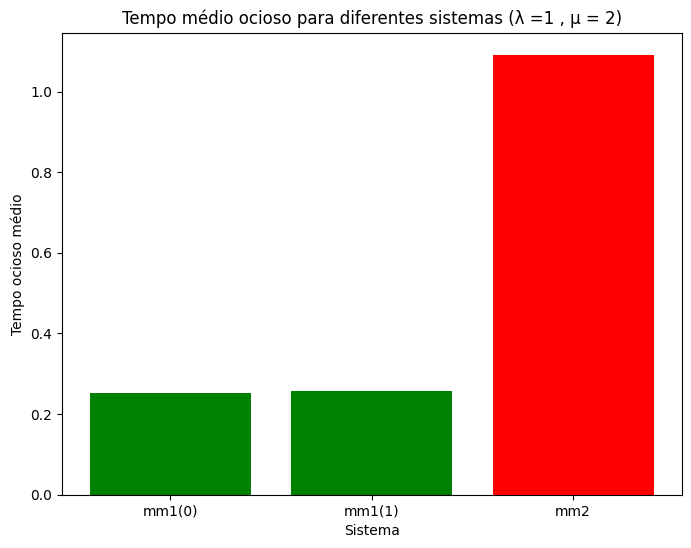

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

montecarlo = 500

def MM1_sim(lambda_, mu, num_simulations = 1000):
    idle_times = []
    for _ in range(num_simulations):
        num_clients = np.random.poisson(lambda_)
        service_times = np.random.exponential(1/mu, num_clients)
        arrival_times = np.cumsum(service_times)

        waiting_times = [0]  # O primeiro cliente não espera
        for i in range(1, num_clients):
            wait = max(0, arrival_times[i-1] + service_times[i-1] - arrival_times[i])
            waiting_times.append(wait)

        # O servidor fica ocioso entre a saída de um cliente e a chegada do próximo
        for i in range(1, num_clients):
            idle_time = max(0, arrival_times[i] - (arrival_times[i-1] + service_times[i-1]))
            idle_times.append(idle_time)

    return np.mean(idle_times)


def MM2_sim(lambda_, mu, num_simulations = 1000):
    idle_times = []
    for _ in range(num_simulations):
        num_clients = np.random.poisson(lambda_)
        service_times = np.random.exponential(1 / mu, num_clients)
        arrival_times = np.cumsum(service_times)

        service_end_times_1 = [0]
        service_end_times_2 = [0]
        for i in range(1, num_clients):
            # O cliente vai para o servidor que terminará primeiro
            if service_end_times_1[-1] <= service_end_times_2[-1]:
                service_end_times_1.append(max(arrival_times[i], service_end_times_1[-1]) + service_times[i])
                idle_time = max(0, arrival_times[i] - service_end_times_1[-2])
            else:
                service_end_times_2.append(max(arrival_times[i], service_end_times_2[-1]) + service_times[i])
                idle_time = max(0, arrival_times[i] - service_end_times_2[-2])

            idle_times.append(idle_time)

    return np.mean(idle_times)

ocioso_mm1_1 = 0
ocioso_mm1_2 = 0
ocioso_mm2 = 0

for i in range(0,montecarlo):
    ocioso_mm1_1 += MM1_sim(1,2,num_simulations= 300)
    ocioso_mm1_2 += MM1_sim(1,2,num_simulations= 300)
    ocioso_mm2 += MM2_sim(1,2,num_simulations= 300)

ocioso_mm1_1 /= montecarlo
ocioso_mm1_2 /= montecarlo
ocioso_mm2 /= montecarlo

values = [ocioso_mm1_1, ocioso_mm1_2, ocioso_mm2]
labels = ['mm1(0)', 'mm1(1)', 'mm2']
colors = ['green', 'green', 'red']
plt.figure(figsize=(8, 6))
# Cria o gráfico de barras
plt.bar(labels, values, color=colors)

plt.title("Tempo médio ocioso para diferentes sistemas (λ =1 , μ = 2)")
plt.xlabel("Sistema")
plt.ylabel("Tempo ocioso médio")

plt.show()


# Questão 4

In [ ]:
print("OI")